## Imports

In [212]:
# Data and visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, Models and Metrics

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Data Reading

In [213]:
df = pd.read_csv(r'D:\Projetos Python\Student Performance Pred\student_exam_data.csv')


## EDA 

In [214]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [215]:
print("--" * 25)
print(" " * 17, "Dataset Info")
print("--" * 25)
df.info()
df['P/F'] = np.where(df['Pass/Fail'] == 0, 'Fail', 'Pass')

--------------------------------------------------
                  Dataset Info
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [216]:
df.head()

,Study Hours,Previous Exam Score,Pass/Fail,P/F
0,4.370861,81.889703,0,Fail
1,9.556429,72.165782,1,Pass
2,7.587945,58.571657,0,Fail
3,6.387926,88.827701,1,Pass
4,2.404168,81.083870,0,Fail


In [217]:
#df.head()
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


<Axes: >

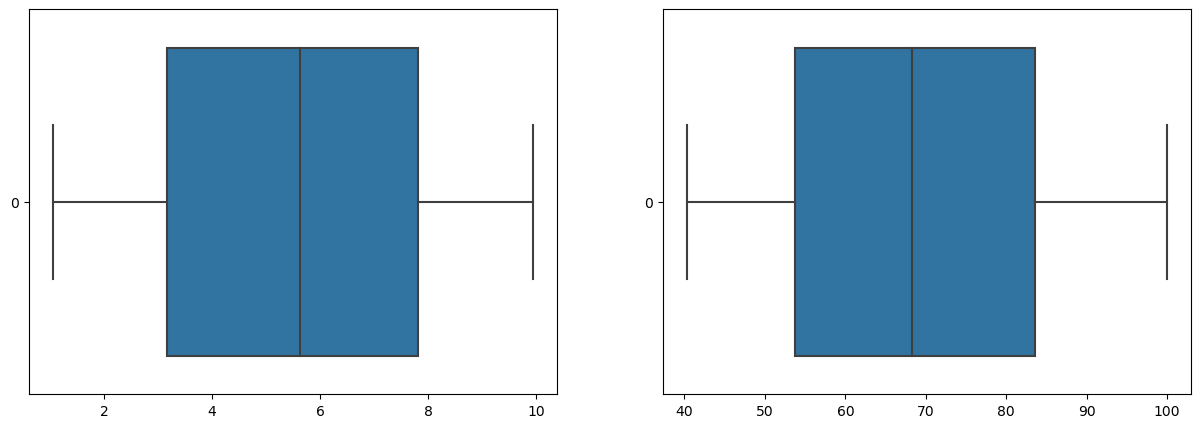

In [218]:
df_1 = df.drop(['P/F'], axis=1)

fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.boxplot(df_1['Study Hours'], ax=ax1, orient='h')
sns.boxplot(df_1['Previous Exam Score'], ax=ax2, orient='h')

<Axes: >

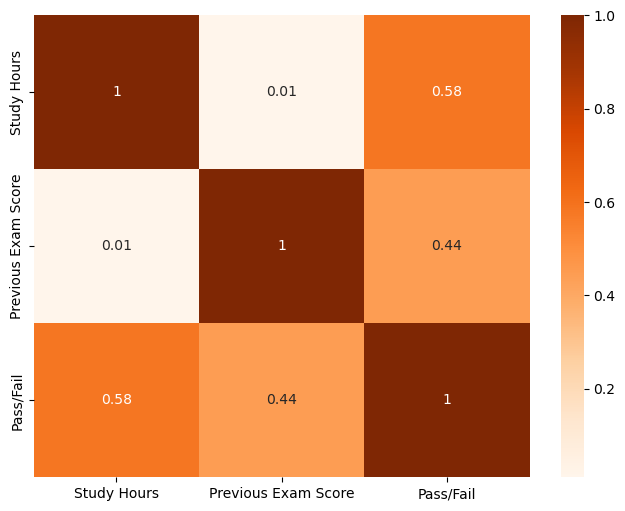

In [219]:
plt.figure(figsize=(8,6))
sns.heatmap(df_1.corr(), annot=True, cmap = 'Oranges')

<Axes: xlabel='Previous Exam Score', ylabel='Count'>

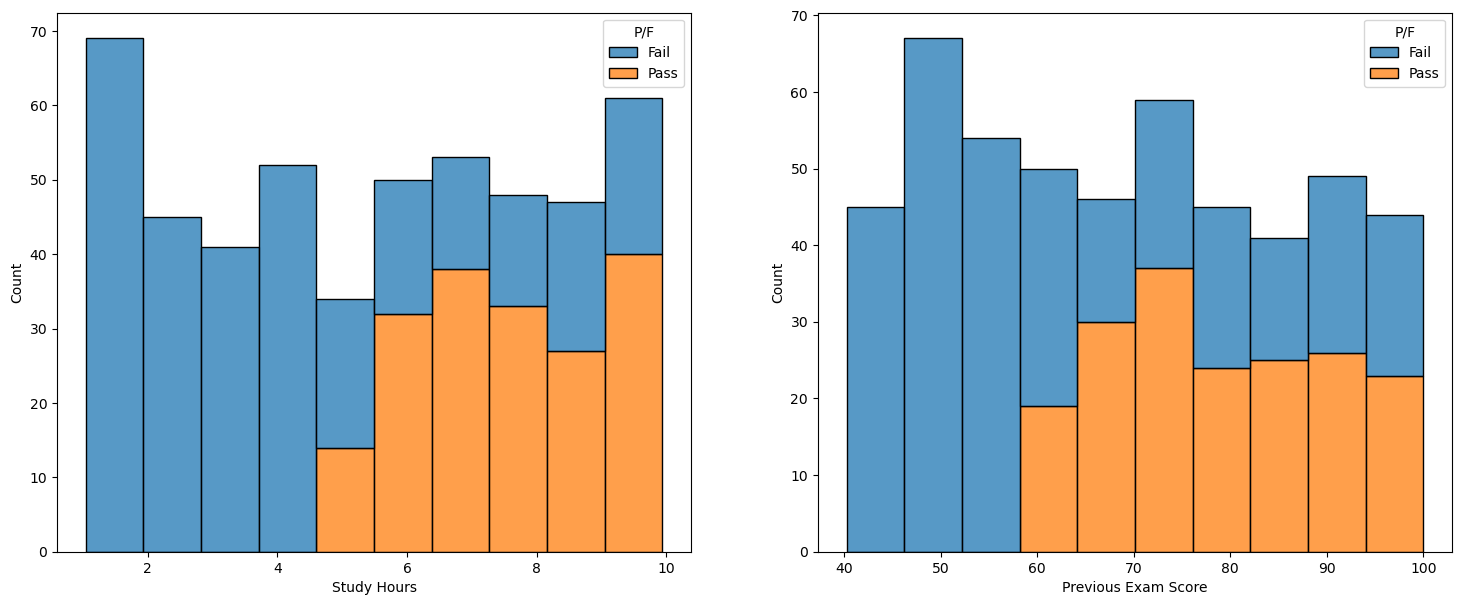

In [220]:
fig,(ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)

sns.histplot(data = df, x='Study Hours', hue=df['P/F'], multiple='stack', ax=ax1)
sns.histplot(data = df, x='Previous Exam Score', hue=df['P/F'], multiple='stack', ax=ax2)

## Preprocessing

In [221]:
X = df.drop(['Pass/Fail', 'P/F'], axis=1)
y = df['Pass/Fail']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [223]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [224]:
model_rf = RandomForestRegressor()
model_lr = LinearRegression()
model_et = ExtraTreesRegressor()

models = {'RandomForest':model_rf,'LinearRegression': model_lr, 'ExtraTreesRegressor': model_et}

In [225]:
def model_evaluation(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    rsme = np.sqrt(mean_squared_error(y_test, y_pred))

    return ('{} Model: \n R²: {}\n RSME:{}'.format(model_name, r2, rsme))


for model_name, model, in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Test
    pred = model.predict(X_test_scaled)
    # Metrics
    print(model_evaluation(model_name,y_test,pred))
    


RandomForest Model: 
 R²: 0.9999751335420888
 RSME:0.00244948974278318
LinearRegression Model: 
 R²: 0.5672971208905931
 RSME:0.3231197872605947
ExtraTreesRegressor Model: 
 R²: 0.9981184380180512
 RSME:0.021307275752662516


In [226]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)


## Testing the model

In [228]:
lst=[]

sth = float(input('Study Hours: '))

while sth < 0 or sth > 10:
    print('Error: Study Hours should be 0-10\n')
    sth = float(input('Study Hours: '))
else:
    
    lst.append(sth)

pes = float(input('Previous Exam Score: '))

while pes < 0 or pes > 100:
    print('Error: Your Score should be between 0-100\n')
    pes = float(input('Previous Exam Score: '))
else:
    lst.append(pes)


print('Study Hours: {}\nPrevious Exam Score: {}'.format(lst[0],lst[1]))

X_value=np.array(lst)
X_value=X_value.reshape(1,-1)

y_pred = regressor.predict(X_value)

for value in y_pred:
    if value == 1:
        y_pred = 'You may Pass!'
    elif value == 0:
        y_pred = 'You may Fail!'
    else:
        y_pred = 'Error!! Try again'
    

print(y_pred)

Study Hours: 1.0
Previous Exam Score: 80.0
You may Fail!


d:\Anaconda\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
